# Rice Diseases Classification using cnn with tensorflow
- Author: Hasnain Yaqoob
- Competition:[Paddy Doctor: Paddy Disease Classification](https://www.kaggle.com/competitions/paddy-disease-classification)
- Profiles: 
    - Kaggle:[Hasnain Yaqoob](https://www.kaggle.com/hasnainyaqooob)
    - LinkedIn:[Hasnain Yaqoob](https://www.linkedin.com/in/hasnainyaqoob)
    - GitHub:[Hasnain Yaqoob](https://github.com/hasnainyaqub)

In [205]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras as ks 

In [206]:
# import dataset
df = pd.read_csv('./Data/Paddy_rice_disease/train.csv')
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [207]:
# check the shape of the dataset
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

10407 rows and 4 columns


In [208]:
df['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [209]:
df['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

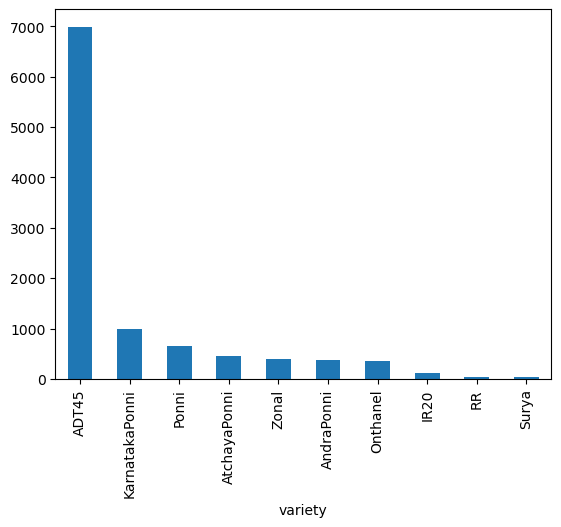

In [210]:
# Plot the data count based on variety name
df['variety'].value_counts().plot(kind='bar')
plt.show()

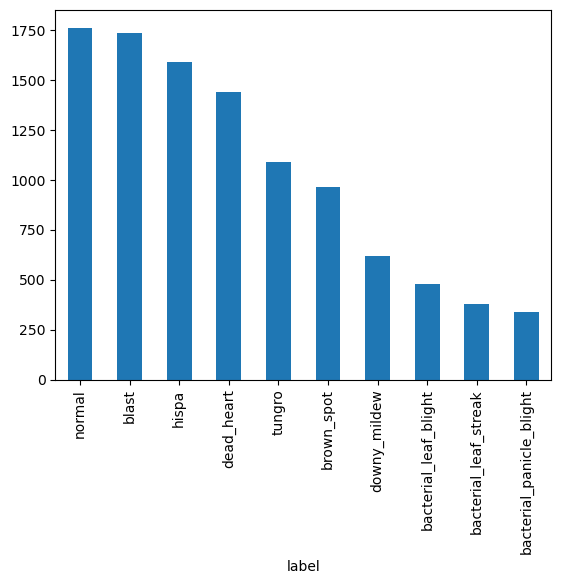

In [211]:
# Plot the data count based on variety name
df['label'].value_counts().plot(kind='bar')
plt.show()

In [212]:
normal = df[df['label'] == 'normal']
normal= normal[normal['variety'] == 'ADT45']    
five_normals = normal.image_id[18:24].values
print(five_normals.tolist())

dead = df[df['label'] == 'dead_heart']
normal= dead[dead['variety'] == 'ADT45']    
five_deads = dead.image_id[18:24].values
print(five_deads.tolist())

['100962.jpg', '101041.jpg', '101115.jpg', '101269.jpg', '101464.jpg', '101470.jpg']
['103597.jpg', '103727.jpg', '103753.jpg', '104540.jpg', '104698.jpg', '104991.jpg']


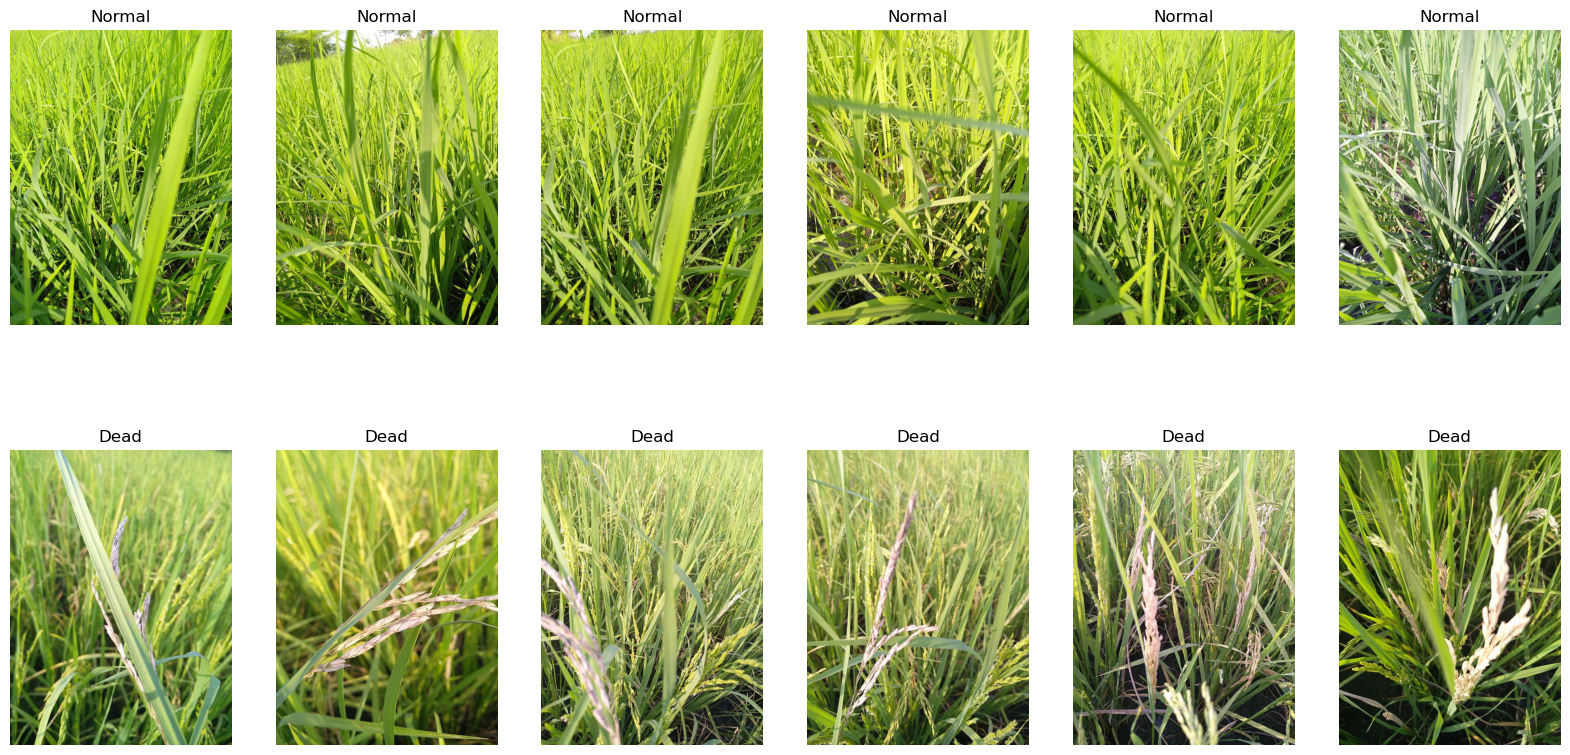

In [213]:
# Make plot of images just to have an idea
plt.figure(figsize=(20,10))
cols = 6
path = './Data/Paddy_rice_disease/train_images/'
for i, image_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//cols + 1, cols, i + 1)

    if i < len(five_normals):
        img = plt.imread(path + 'normal/' + image_loc)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Normal')
    else:
        img = plt.imread(path + 'dead_heart/' + image_loc)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Dead')
    


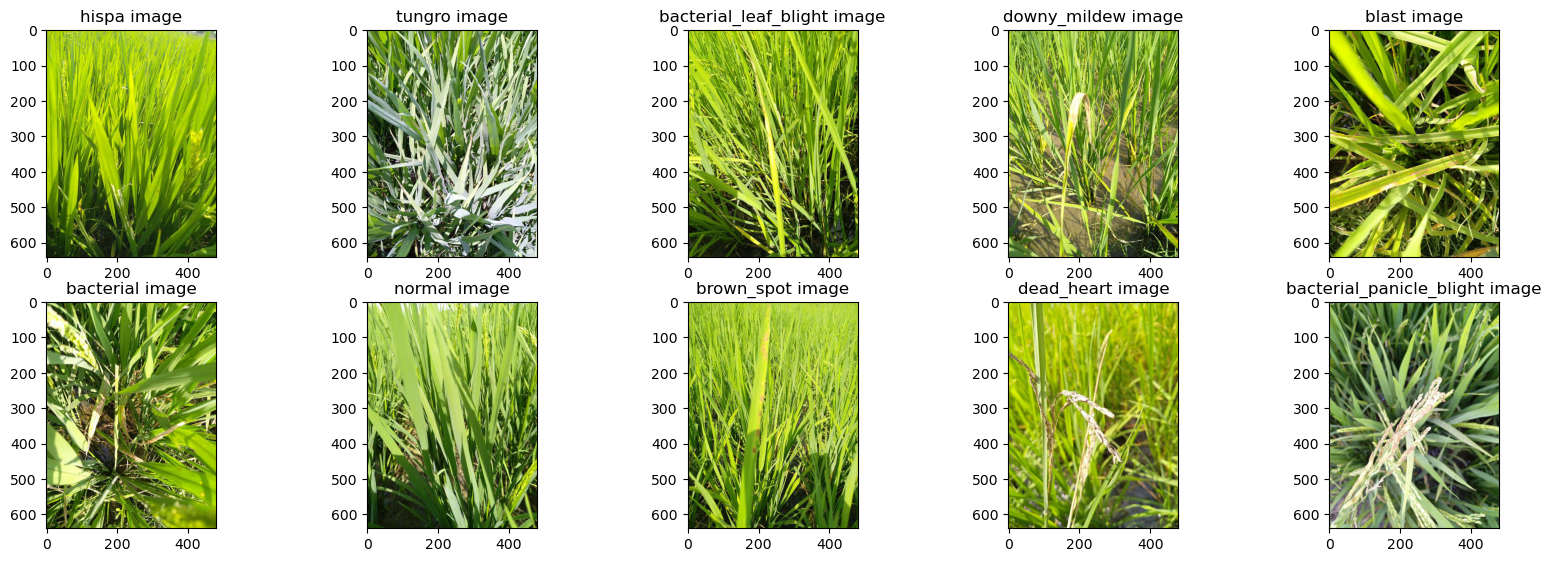

In [214]:
images = [
    './Data/Paddy_rice_disease/train_images/hispa/106590.jpg', \
    './Data/Paddy_rice_disease/train_images/tungro/109629.jpg',\
    './Data/Paddy_rice_disease/train_images/bacterial_leaf_blight/109372.jpg', \
    './Data/Paddy_rice_disease/train_images/downy_mildew/102350.jpg',\
    './Data/Paddy_rice_disease/train_images/blast/110243.jpg',\
    './Data/Paddy_rice_disease/train_images/bacterial_leaf_streak/101104.jpg',\
    './Data/Paddy_rice_disease/train_images/normal/109760.jpg',\
    './Data/Paddy_rice_disease/train_images/brown_spot/104675.jpg',\
    './Data/Paddy_rice_disease/train_images/dead_heart/105159.jpg',\
    './Data/Paddy_rice_disease/train_images/bacterial_panicle_blight/101351.jpg',\
    ]

diseases = ['hispa', 'tungro', 'bacterial_leaf_blight', 'downy_mildew', 'blast', 'bacterial',
'normal','brown_spot', 'dead_heart', 'bacterial_panicle_blight']
diseases = [disease +' image' for disease in diseases]

plt.figure(figsize=(20,10)) 
columns = 5

for i, image_loc in enumerate( images):
    plt.subplot(len(images)//columns + 1,columns, i + 1)
    image=plt. imread (image_loc)
    plt. title(diseases[i])
    plt. imshow (image)

In [215]:
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [216]:
# lets encode the label & variety columns
le_list = {}
for col in ['label', 'variety']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_list[col] = le

In [217]:
# define parameters
batch_size = 32
image_size = (224, 224)
num_classes = 10
epochs = 50

In [218]:
# split the data
train_df = ks.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=122,
    image_size=image_size,
    batch_size=batch_size
)
val_df = ks.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=122,
    image_size=image_size,
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [219]:
# get class names
class_names = train_df.class_names  
print(class_names)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [220]:
# lets check the shape of img
for image_batch, labels_batch in train_df:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [221]:
# lets normalize the data
normalization_layer = ks.layers.Rescaling(1./255)
normalized_df = train_df.map(lambda x, y: (normalization_layer(x), y))
first_image, first_label = next(iter(normalized_df))
# Check the pixel value range
print(first_image[0].numpy().min(), first_image[0].numpy().max())

0.0 1.0


In [222]:
AUTOTUNE = tf.data.AUTOTUNE
train_df = train_df.cache().prefetch(buffer_size=AUTOTUNE)
val_df = val_df.cache().prefetch(buffer_size=AUTOTUNE)

In [243]:
# create the model
model = ks.Sequential([
    ks.Input(shape=(224, 224, 3)),       # Correct input shape
    ks.layers.Rescaling(1./255),

    ks.layers.Conv2D(32, 3, padding='same', activation='relu'),
    ks.layers.MaxPooling2D(),

    ks.layers.Conv2D(32, 3, padding='same', activation='relu'),
    ks.layers.MaxPooling2D(),

    ks.layers.Conv2D(64, 3, padding='same', activation='relu'),
    ks.layers.MaxPooling2D(),

    ks.layers.Conv2D(128, 3, padding='same', activation='relu'),
    ks.layers.MaxPooling2D(),

    ks.layers.Flatten(),                        # This will now be 12544
    ks.layers.Dropout(0.2),
    
    ks.layers.Dense(256, activation='relu'),    # Will automatically fit 12544 input
    ks.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_33 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_104               │ (None, 112, 112, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 56, 56, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_106               │ (None, 28, 28, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_107               │ (None, 14, 14, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,527,850 (24.90 MB)

 Trainable params: 6,527,850 (24.90 MB)

 Non-trainable params: 0 (0.00 B)

In [232]:
# compile the model
model.compile(
    optimizer='adam',
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [246]:
# train the model
history = model.fit(
    train_df,
    validation_data=val_df,
    epochs=10
)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.5303 - loss: 1.3888 - val_accuracy: 0.6689 - val_loss: 1.0712
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.7509 - loss: 0.7836 - val_accuracy: 0.7309 - val_loss: 1.0178
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.8664 - loss: 0.4238 - val_accuracy: 0.7275 - val_loss: 1.1776
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.9150 - loss: 0.2480 - val_accuracy: 0.7751 - val_loss: 1.1273
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.9543 - loss: 0.1475 - val_accuracy: 0.8121 - val_loss: 0.9596
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.9624 - loss: 0.1159 - val_accuracy: 0.8184 - val_loss: 1.0159
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.9676 - loss: 0.1048 - val_accuracy: 0.8059 - val_loss: 1.0001
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.9717 - loss: 0.0867 - val_accu

In [249]:
# save the model
model.save('Rice_Disease_Classification_Model.keras')

In [247]:
# evaluate the model
loss, accuracy = model.evaluate(train_df)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

261/261 ━━━━━━━━━━━━━━━━━━━━ 67s 258ms/step - accuracy: 0.9946 - loss: 0.0240
Loss: 0.024178745225071907
Accuracy: 0.9954360127449036


## Observation
1. We have 10407 images in train data.
2. We have 10 unique disease classes.
3. We also have 10 variesites of Rice.
4. We have rice plant age ranging from 45 - 82 days.
5. ADT45 is the most common variety of rice in the train data.